<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Total_Fallecidos_por_Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [0]:
data = pd.DataFrame()

In [0]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2020-03-24-CasosConfirmados-totalRegional.csv", index_col='Region')

In [4]:
data_raw.head(3)

,Casos nuevos,Casos totales,Fallecidos
Region,,,
Arica y Parinacota,0,2,0
Tarapacá,1,1,0
Antofagasta,0,11,0


In [0]:
data['2020-03-24'] = data_raw['Fallecidos']

In [0]:
today = '2020-04-09'

In [0]:
first_death_date = '2020-03-24'

In [8]:
total_days = (pd.to_datetime(today)-pd.to_datetime(first_death_date)).days
total_days

16

In [0]:
for i in np.arange(total_days+1):
  date = (pd.to_datetime(first_death_date)+pd.DateOffset(i)).strftime('%Y-%m-%d')
  s = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/" + date + "-CasosConfirmados-totalRegional.csv"
  data_by_date = pd.read_csv(s)
  if 'Fallecidos' in data_by_date.columns:
    data[date] = data_by_date["Fallecidos"].values
  elif 'Casos fallecidos' in data_by_date.columns:
    data[date] = data_by_date["Casos fallecidos"].values
  else:
    data[date] = data_by_date[" Casos fallecidos"].values

In [10]:
data

,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Region,,,,,,,,,,,,,,,,,
Arica y Parinacota,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
Tarapacá,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0.0
Antofagasta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0
Atacama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
Coquimbo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
Valparaíso,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,2,2.0
Metropolitana,1,2,3,3,3,3,3,0,5,6,8,9,10,10,12,14,21.0
O’Higgins,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
Maule,0,0,0,0,0,0,1,0,1,1,1,1,1,1,2,2,2.0


In [11]:
data['2020-04-09'].loc["Total"] = data['2020-04-09'].iloc[:-1].sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
data['2020-04-09'] = data['2020-04-09'].astype(int)

In [13]:
data[['2020-03-30', '2020-03-31', '2020-04-01']]

,2020-03-30,2020-03-31,2020-04-01
Region,,,
Arica y Parinacota,0,0,0
Tarapacá,0,4,0
Antofagasta,0,0,0
Atacama,0,0,0
Coquimbo,0,0,0
Valparaíso,0,2,1
Metropolitana,3,0,5
O’Higgins,0,0,0
Maule,1,0,1


In [0]:
data = data.drop(columns='2020-03-31')

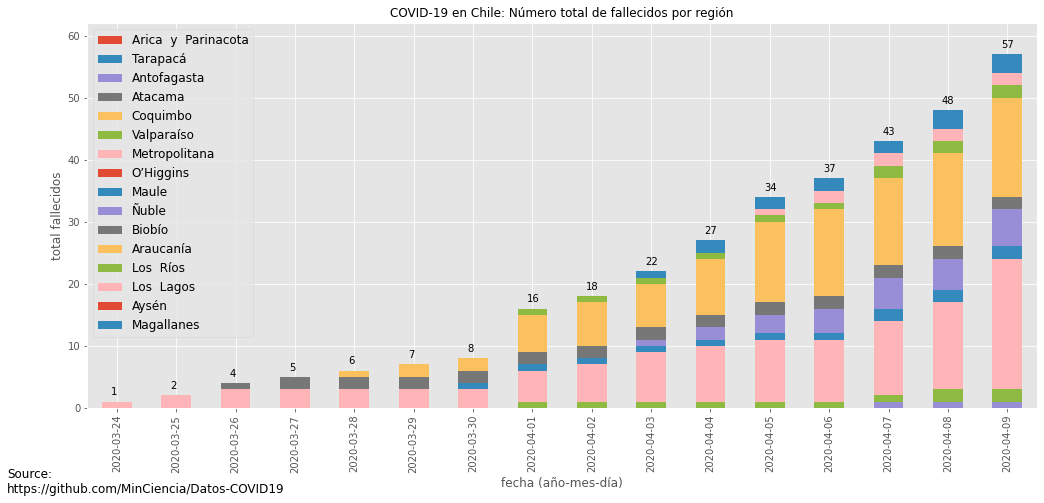

In [15]:
fig, ax = plt.subplots(figsize=(14,7))
data[:-1].T.plot(ax=ax, kind="bar", stacked=True)
for i, val in enumerate(data.loc['Total']):
  ax.text(i-0.1, val+1, str(int(val)), fontsize=10)
plt.legend(fontsize='large')
ax.set_title(f'COVID-19 en Chile: Número total de fallecidos por región', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='large')
ax.set_ylabel(f'total fallecidos', fontsize='large')
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-60), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.ylim(0,62)
plt.savefig('2020-04-09-COVID-19-Chile-Fallecidos.png', bbox_inches='tight', format='png', dvi=700)

In [0]:
from google.colab import files
files.download("2020-04-09-COVID-19-Chile-Fallecidos.png")